# Project 9: Partial Correlations and Directed Acyclic Graphs


## Chains

Text(0.5, 1.0, 'Chain')

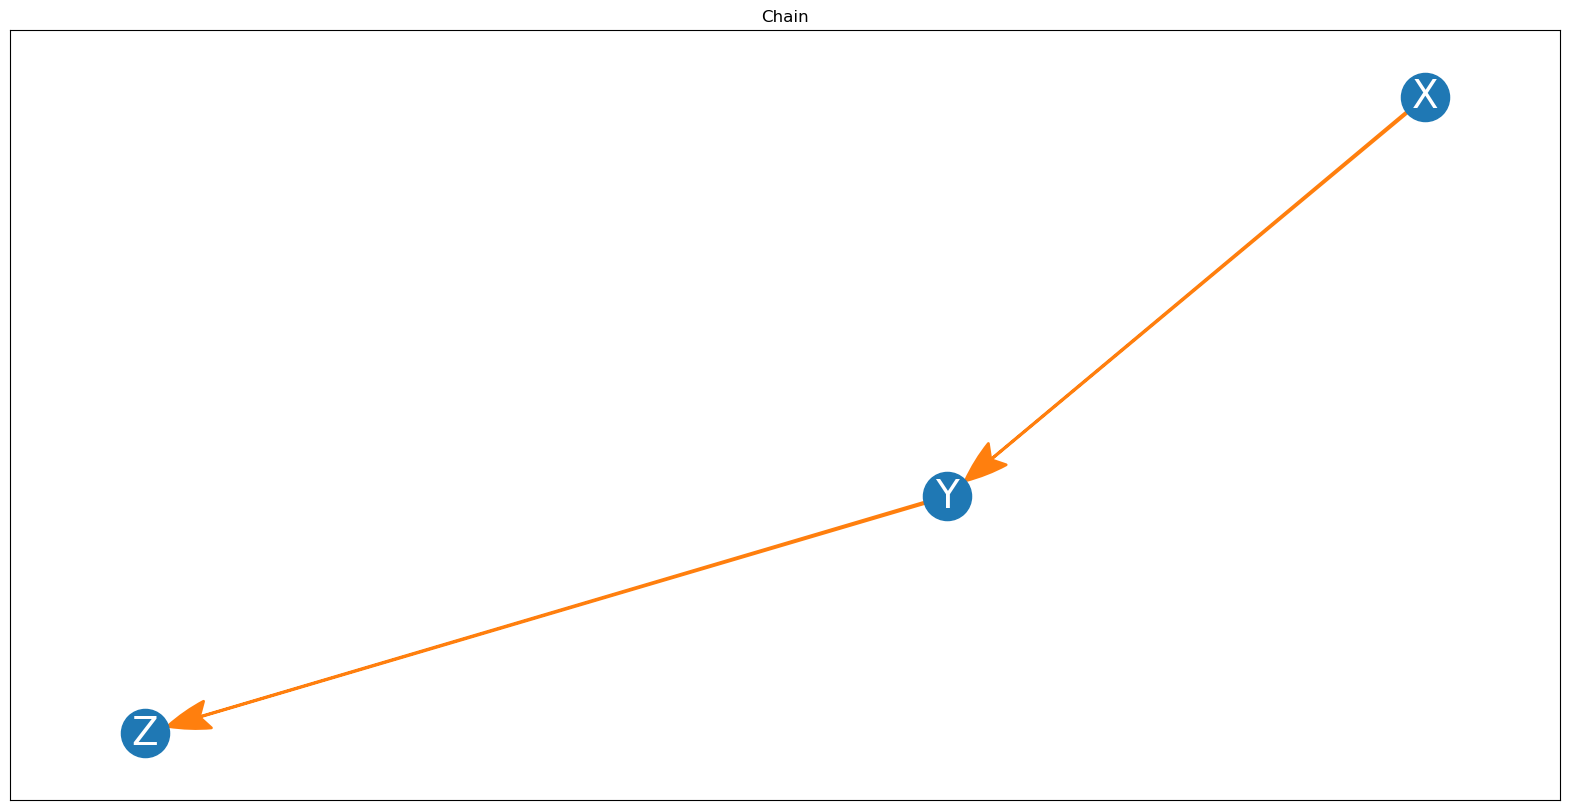

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle

# initiate graph object
G = nx.DiGraph()
G.add_edges_from([("X", "Y"), ("Y", "Z")])
pos = nx.spring_layout(G)
arrow_style = ArrowStyle("Fancy, head_length=3, head_width=2, tail_width=.1")
# graph
fig, ax = plt.subplots(figsize = (20,10))
nx.draw_networkx(G, pos, node_size = 1200,
                with_labels = True, arrows = True,
                font_color = "white",
                font_size = 28, alpha = 1,
                width = 2, edge_color = "C1",
                arrowstyle = arrow_style,
                ax = ax)
ax.set_title("Chain")

In [2]:
# import random
import numpy as np
import pandas as pd

length = 100000
cols = ["X", "Y", "Z"]
chain = {col:[] for col in cols}
for i in range(length):
    chain["X"].append(np.random.normal(0,1))
    chain["Y"].append(chain["X"][-1] * -1 + np.random.normal(0,2))
    chain["Z"].append(chain["Y"][-1] * .5 + np.random.normal(0,1))

chain = pd.DataFrame(chain)
chain.tail()

X         Y         Z
99995  0.372031  1.201695  0.121764
99996  0.581788 -3.544343 -2.669061
99997  0.441296 -0.402540  0.072470
99998 -0.385310 -3.881637 -0.077435
99999  1.505634 -0.433268 -1.734309

In [3]:
chain.corr()

X         Y         Z
X  1.000000 -0.451457 -0.337129
Y -0.451457  1.000000  0.746387
Z -0.337129  0.746387  1.000000

C:\Users\JLCat\githubrepositories\Learn-Python-for-Stats-and-Econ\In Class Demonstrations\datlib\plots.py:145: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(data, c = c, alpha = alpha, s = 200 / num_vars, ax=ax)


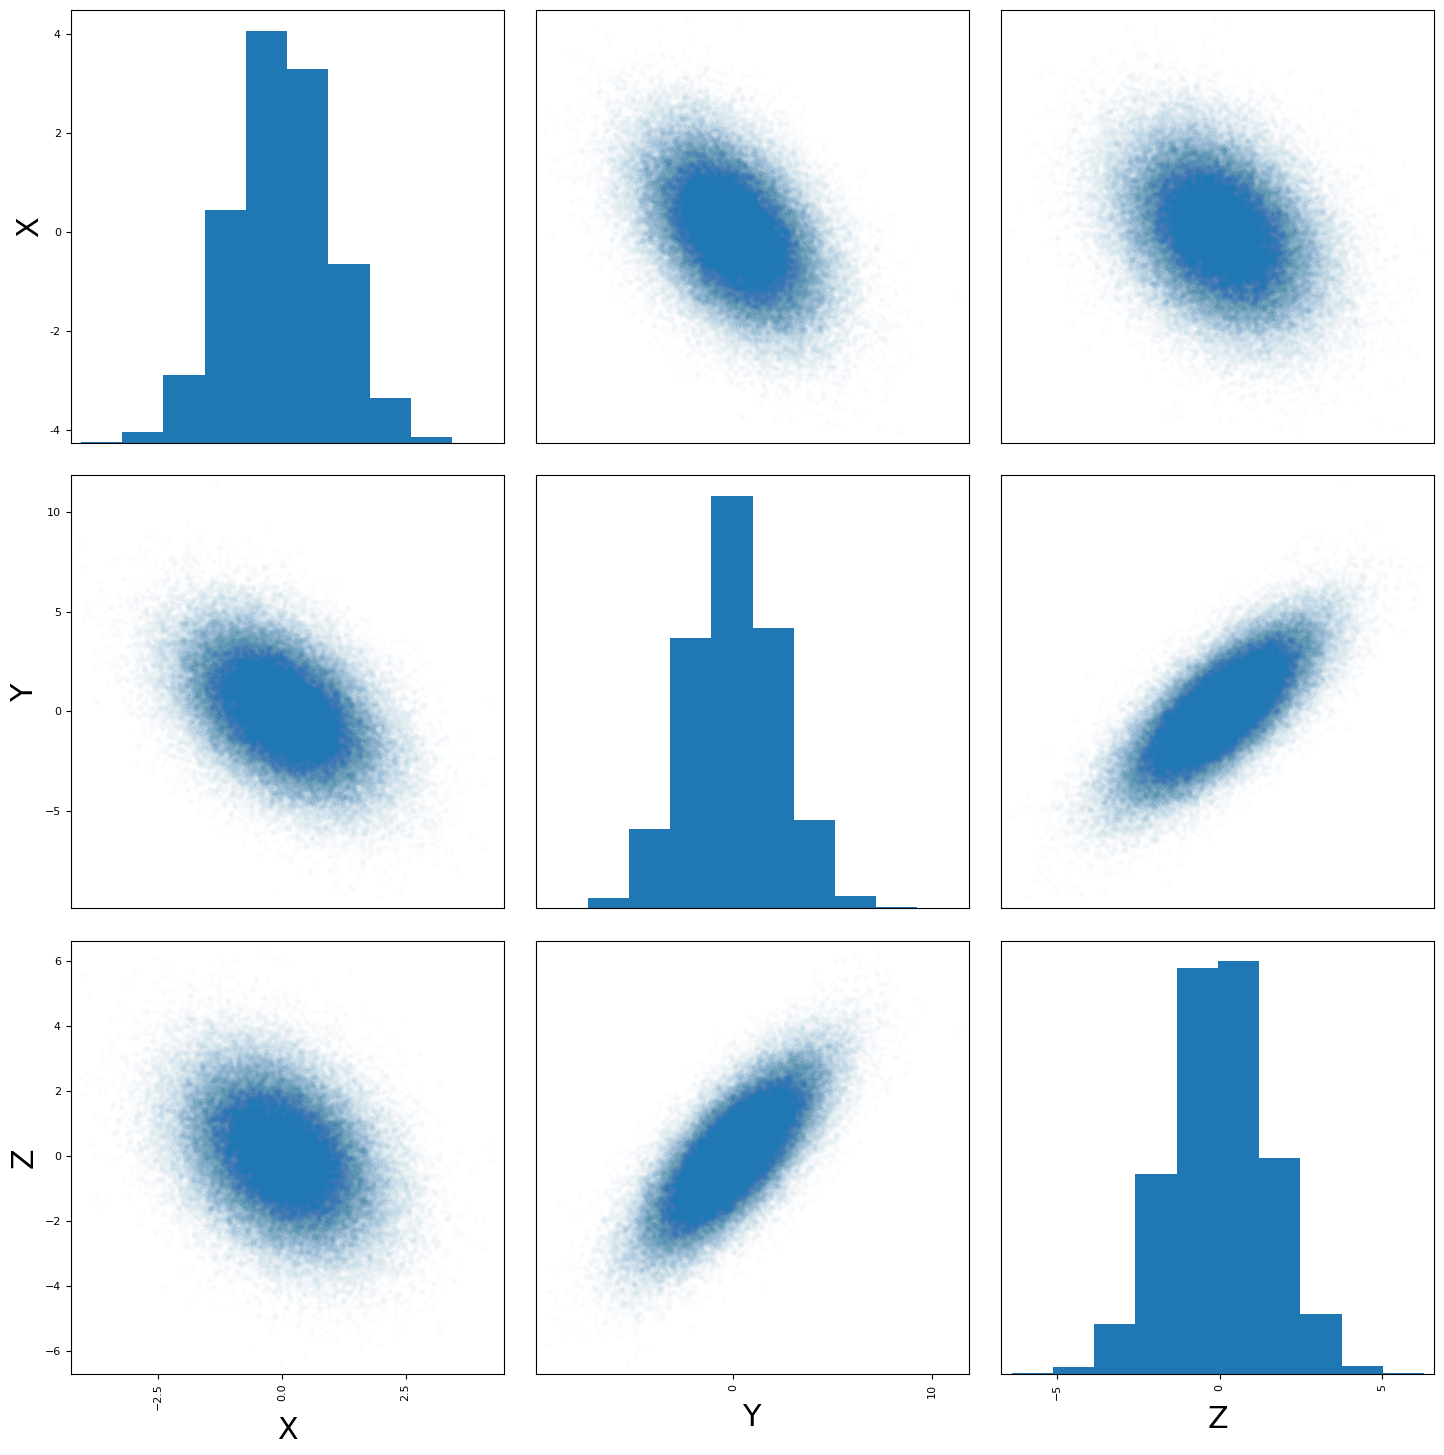

In [4]:
plt.rcParams.update({"font.size":30})
from datlib.plots import *
formatted_scatter_matrix(chain, alpha = 0.015)

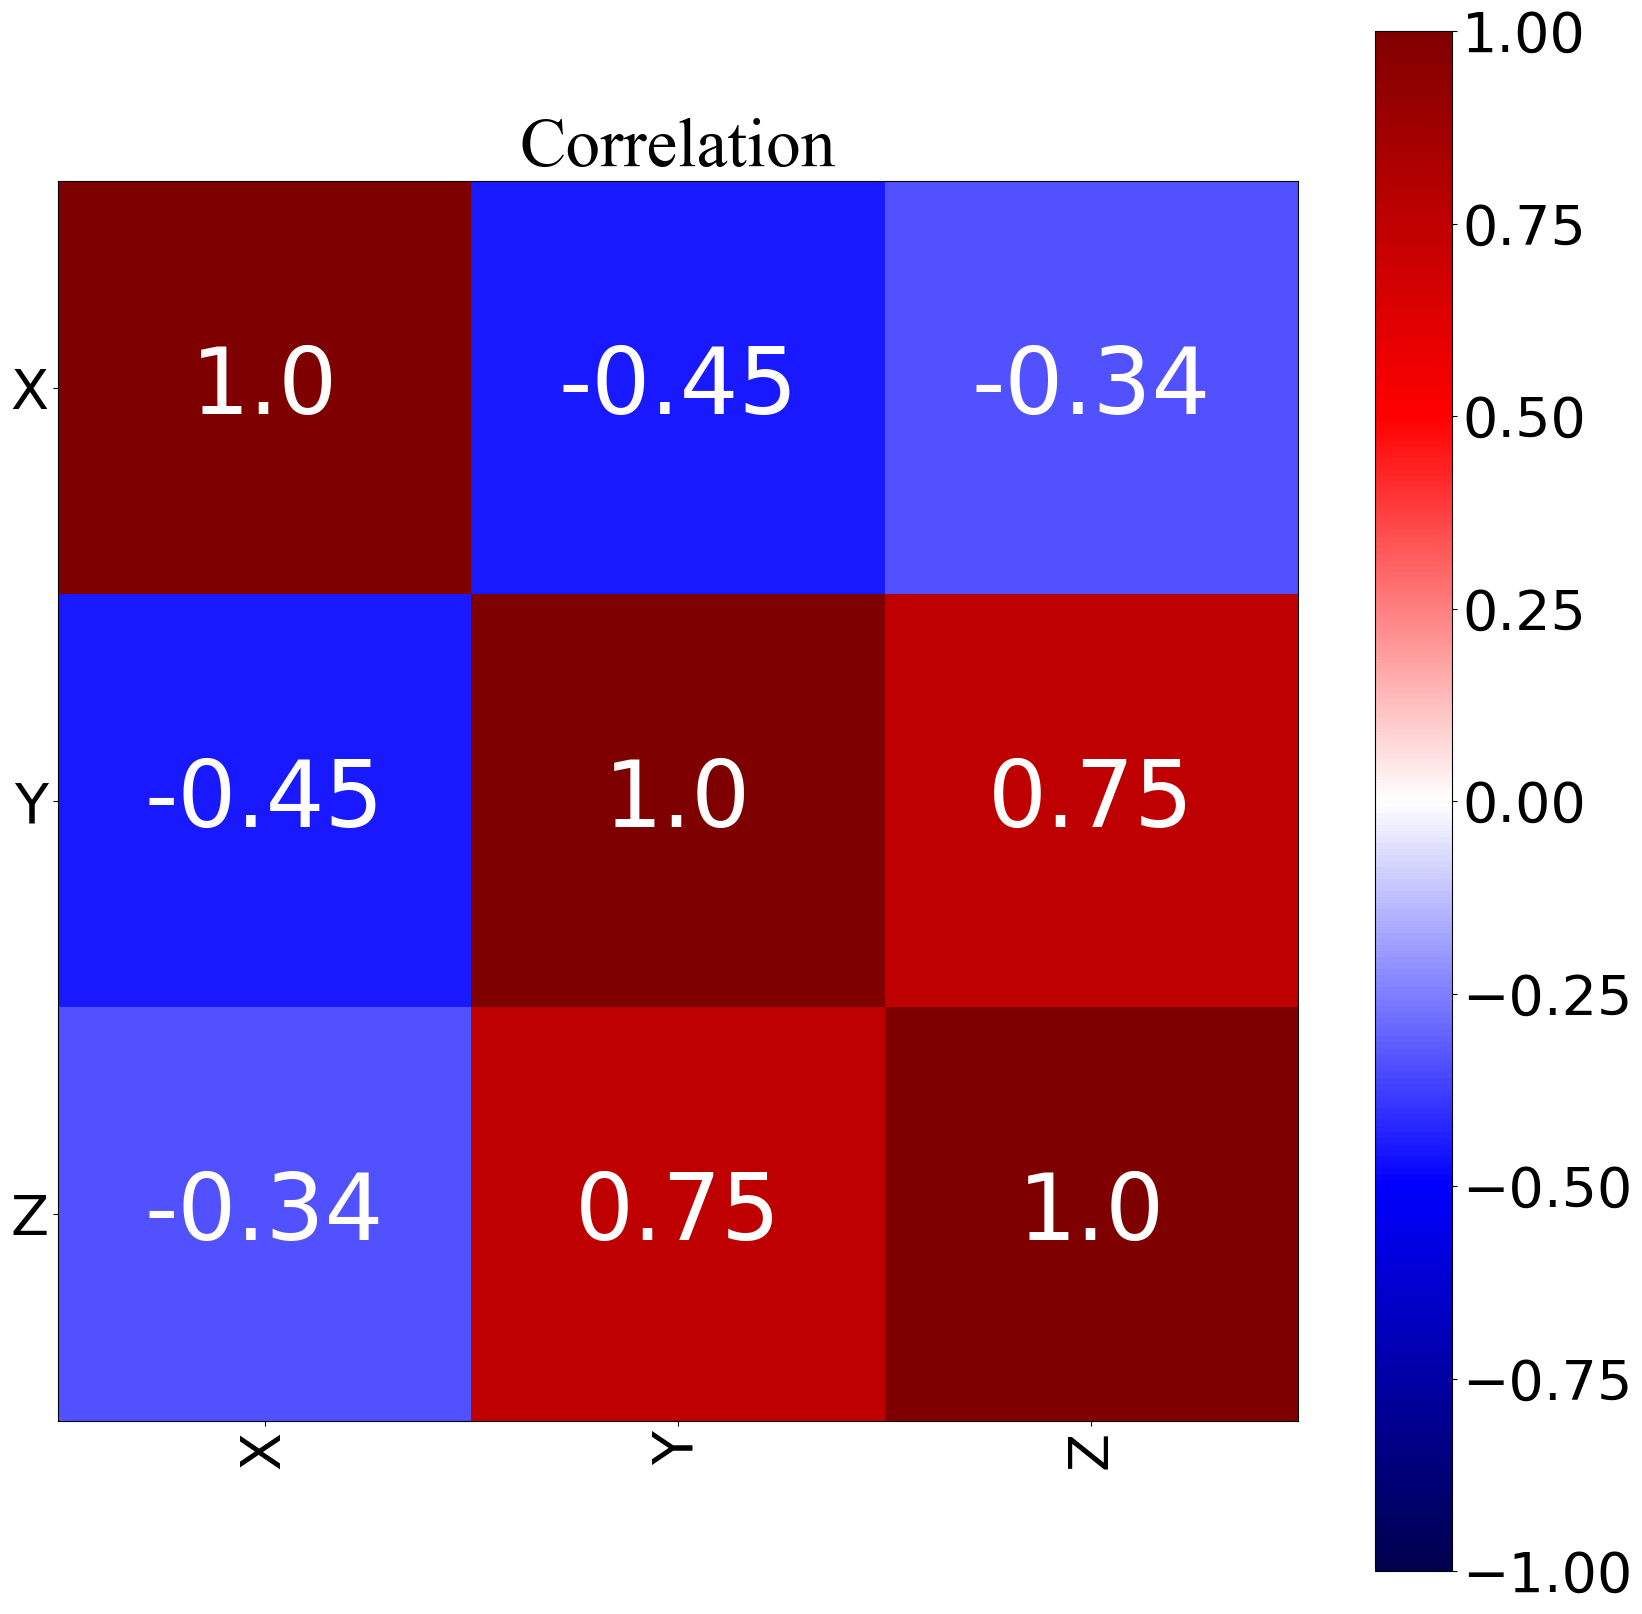

In [5]:
corr_matrix_heatmap(chain.corr(),
                    save_fig = False,
                    pp = None,
                    title = "Correlation")

If we control for $Y$, however, we see that that there is no longer any correlation between $X$ and $Z$. This is called a partial correlation. In the following matrix, partial correlations of each pair are calculated using the remaing variable as a control. We can interpret the result as:

$X \!\perp\!\!\!\perp Z|Y$ 

$Corr(X,Z|Y)\approx 0.00$

First, let's substantiate this intuition using an OLS regression. We run the regression for:

$X = \beta_0 + \beta_Y + \beta_Z + \epsilon_X$

In [6]:
import statsmodels.api as sm

Xc = chain[["X"]]
Xc["Constant"] = 1
Z = chain[["Z"]]

model = sm.OLS(Z, Xc)
results = model.fit()
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20528\3806329196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xc["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                 1.282e+04
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:07:12   Log-Likelihood:            -1.7650e+05
No. Observations:              100000   AIC:                         3.530e+05
Df Residuals:                   99998   BIC:                         3.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             -0.5052      0.004   -113.238      0.000      -0.514      -0.496
Constant       0.0017      0.004      0.389      0.697      -0.007       0.011
==============================================================================
Omnibus:                        3.968   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.968
Skew:                           0.012   Prob(JB):                        0.138
Kurtosis:                       3.019   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:

XYc = chain[["Y", "X"]]
XYc["Constant"] = 1
Z = chain[["Z"]]

model = sm.OLS(Z, XYc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                 6.289e+04
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:07:12   Log-Likelihood:            -1.4182e+05
No. Observations:              100000   AIC:                         2.836e+05
Df Residuals:                   99997   BIC:                         2.837e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Y              0.4999      0.002    316.413      0.000       0.497       0.503
X             -0.0003      0.004     -0.089      0.929      -0.007       0.007
Constant      -0.0022      0.003     -0.704      0.481      -0.008       0.004
==============================================================================
Omnibus:                        0.250   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.248
Skew:                           0.004   Prob(JB):                        0.883
Kurtosis:                       3.001   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
residuals = {}
def get_residuals(df):
    for y_var in df.keys():
        # save all vars in list of X_vars
        X_vars = list(df.keys())
        ## then remove y_var from X_vars
        X_vars.remove(y_var)
        # save X matrix
        X = df[X_vars]
        # add a constant to the X matrix
        X["Constant"] = 1
        # save y matrix (vector)
        y = df[[y_var]]
        model = sm.OLS(y, X)
        results = model.fit()
        ## save error term identified with each regression
        ## name references the explained variable
        residuals["$\\epsilon_{" + y_var + "}$"] = results.resid
    return pd.DataFrame(residuals)
residuals = get_residuals(chain)
residuals

$\epsilon_{X}$  $\epsilon_{Y}$  $\epsilon_{Z}$
0            1.005870        2.633851       -1.741365
1            0.187750       -0.875009       -0.375271
2            0.466087       -2.060517       -0.051500
3           -0.397816       -0.029492        0.086151
4           -1.158116       -2.752616        1.235247
...               ...             ...             ...
99995        0.615932        1.261286       -0.476566
99996       -0.132106       -0.585639       -0.894998
99997        0.361673       -0.258674        0.276046
99998       -1.166568       -4.004674        1.864921
99999        1.419358        2.055841       -1.515038

[100000 rows x 3 columns]

In [9]:
residuals.corr()

$\epsilon_{X}$  $\epsilon_{Y}$  $\epsilon_{Z}$
$\epsilon_{X}$        1.000000        0.318933        0.000282
$\epsilon_{Y}$        0.318933        1.000000       -0.707319
$\epsilon_{Z}$        0.000282       -0.707319        1.000000

In [10]:
def calculate_partial_corr(residuals):
    pcorr = residuals.corr() * -1
    for x in residuals.keys():
        for y in residuals.keys():
            if x == y:
                pcorr[y][x] = 1
    return pcorr
chain_pcorr = calculate_partial_corr(residuals)
chain_pcorr.rename(columns = {r:r[-3] for r in residuals.keys()}, 
                   index = {r:r[-3] for r in residuals.keys()},
                   inplace = True)
chain_pcorr

X         Y         Z
X  1.000000 -0.318933 -0.000282
Y -0.318933  1.000000  0.707319
Z -0.000282  0.707319  1.000000

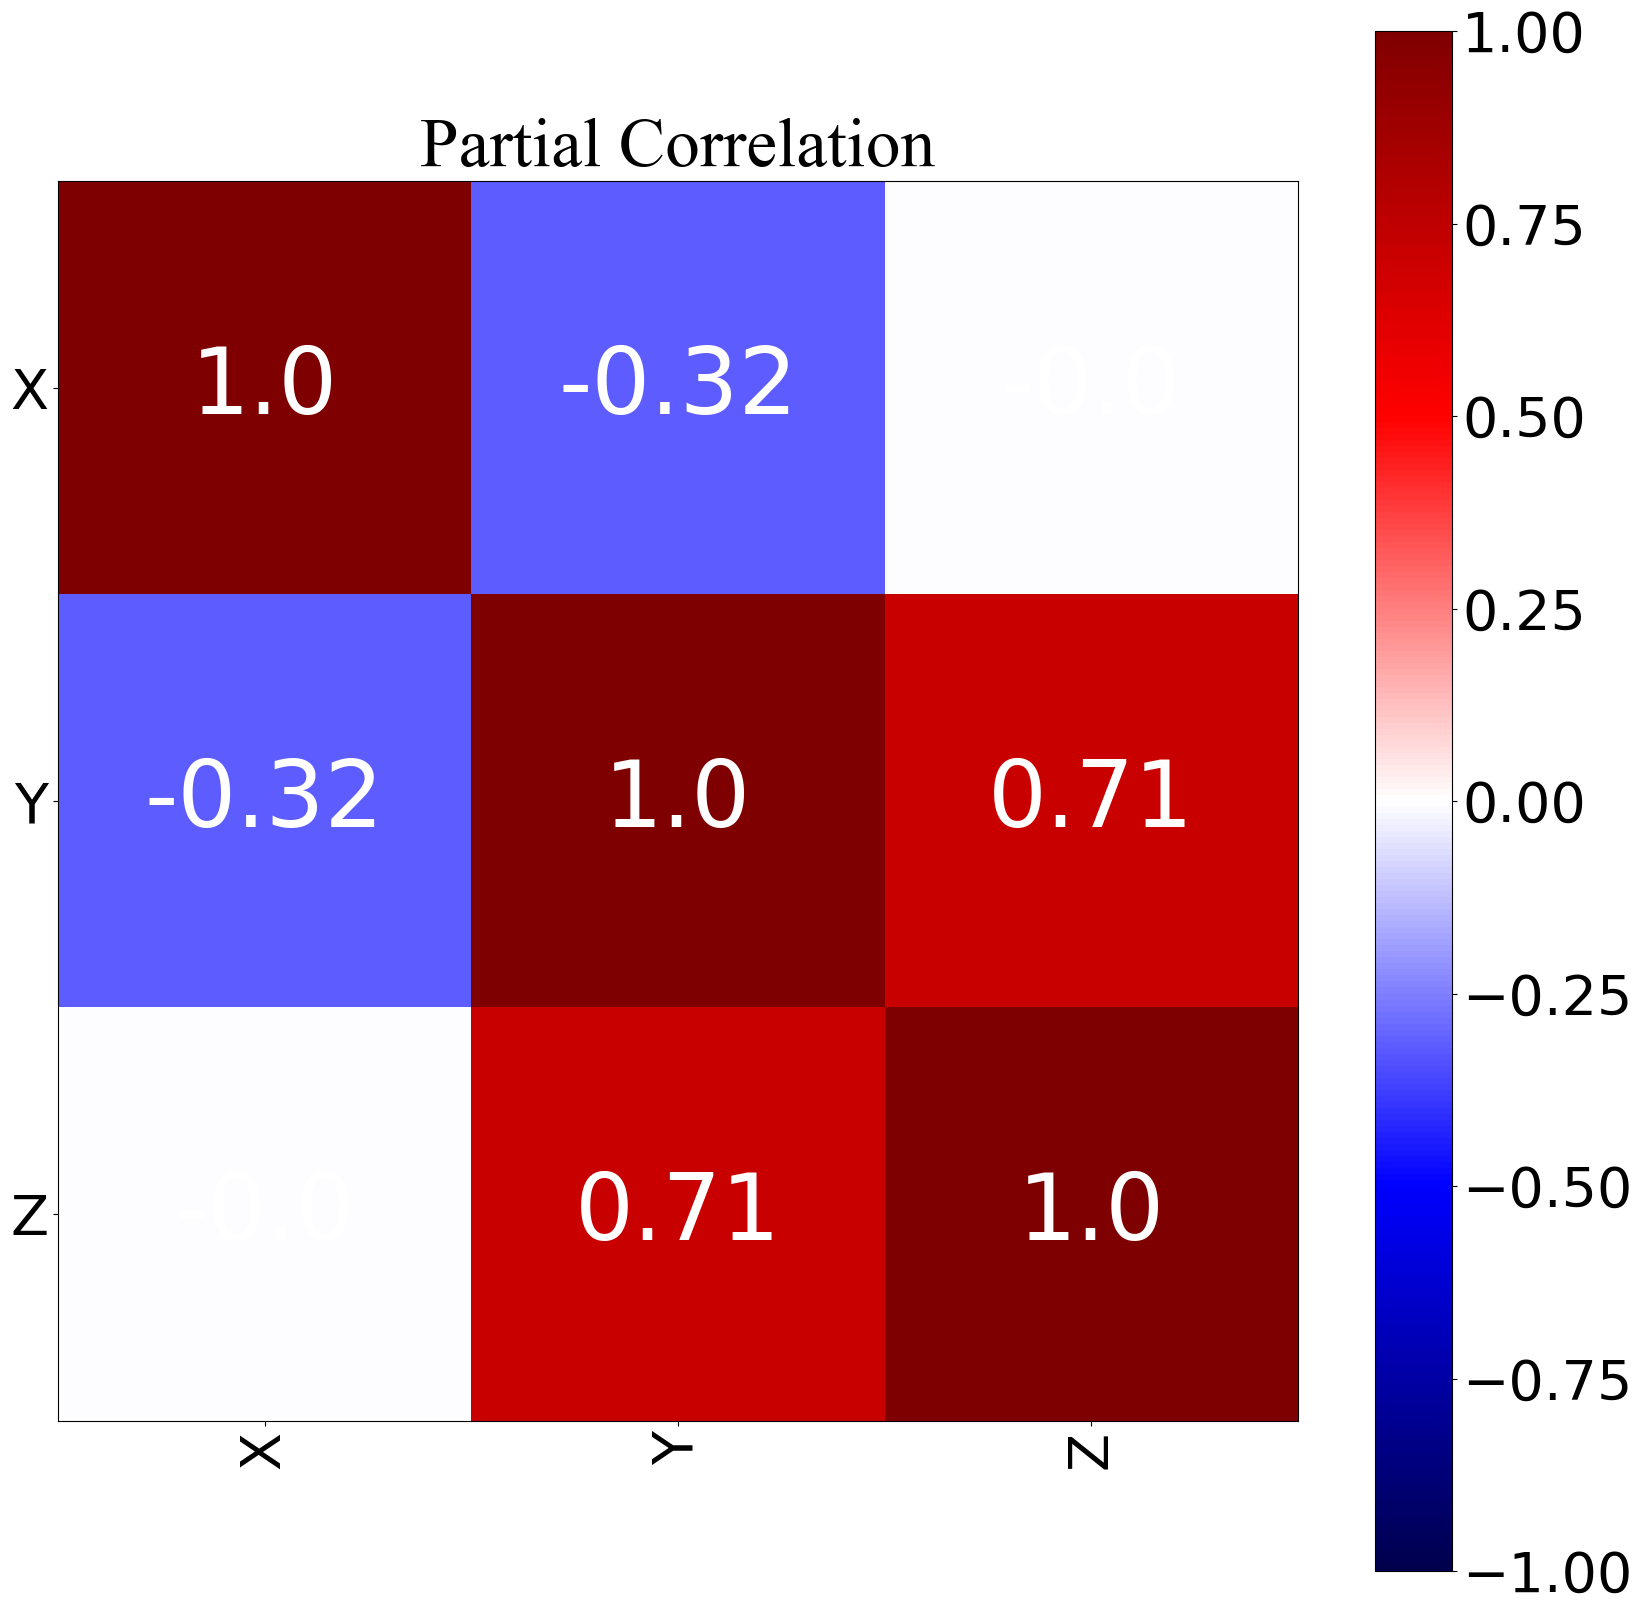

In [11]:
corr_matrix_heatmap(chain_pcorr,
                    save_fig = False,
                    pp = None,
                    title = "Partial Correlation")

In [12]:
# !pip install pingouin
import pingouin
chain.pcorr().round(3)


X      Y      Z
X  1.000 -0.319 -0.000
Y -0.319  1.000  0.707
Z -0.000  0.707  1.000

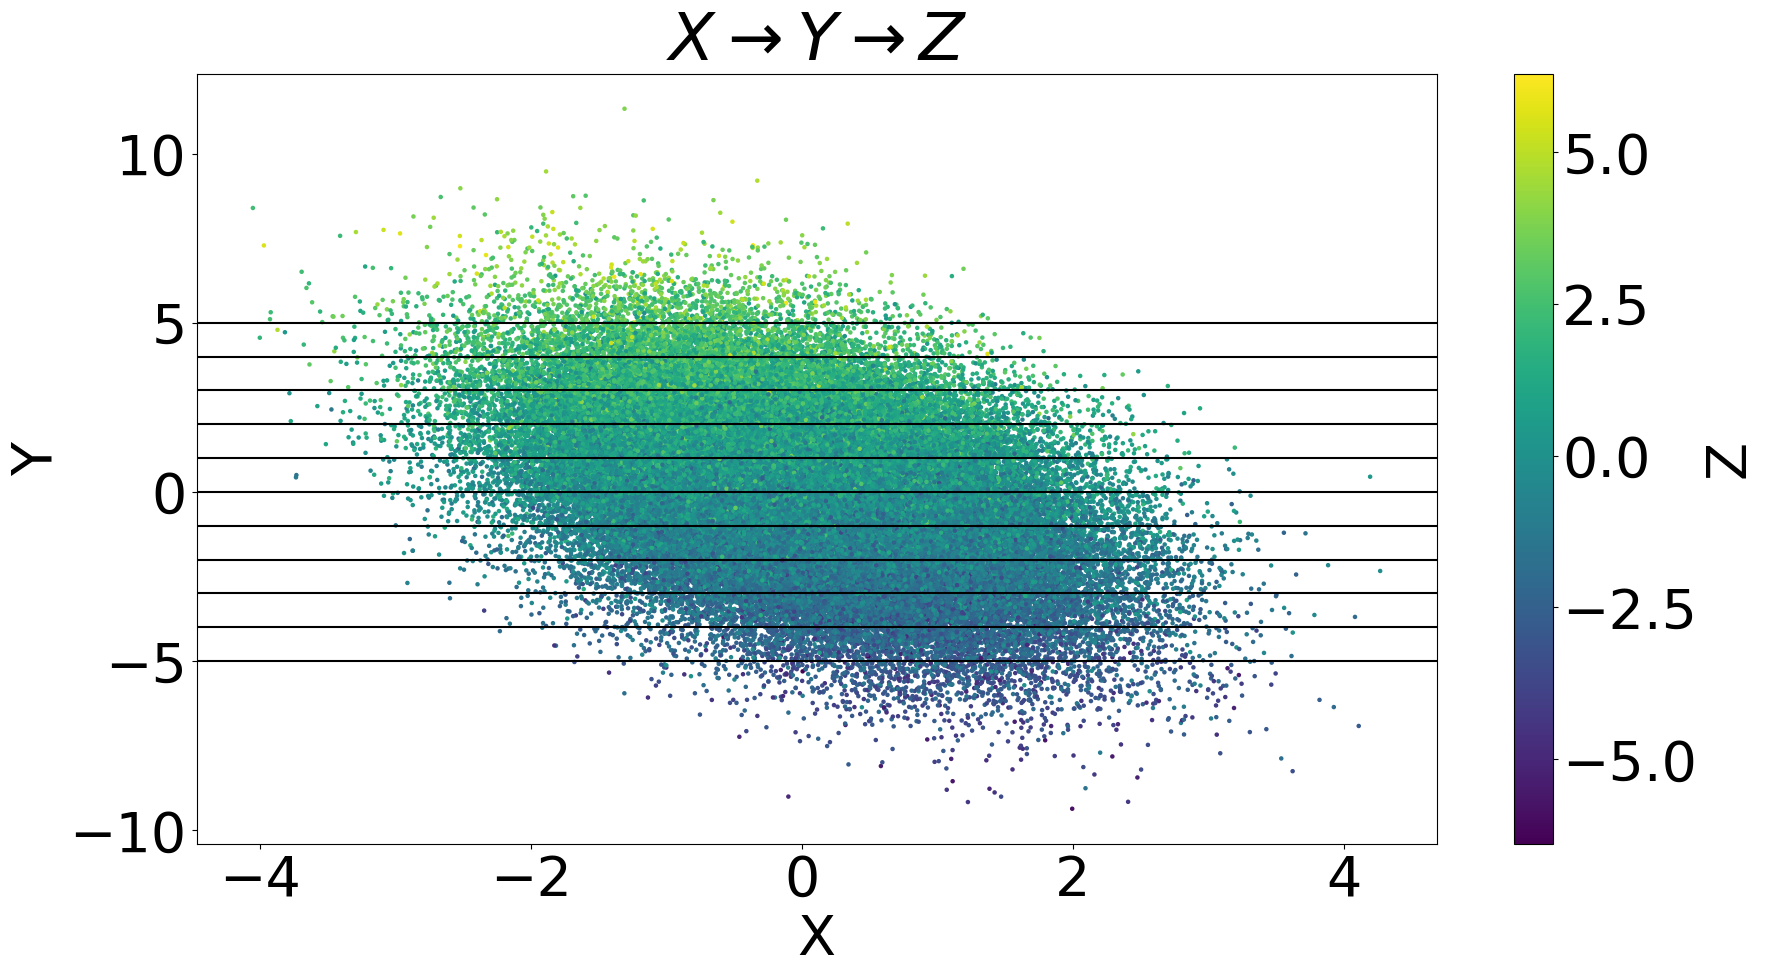

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
chain.plot.scatter(x = "X", y = "Y", c = "Z", cmap = "viridis", s = 5, ax = ax)
ax.set_title("$X \\rightarrow Y \\rightarrow Z$")
for i in range(-5, 6): ax.axhline(i, c = "k")

## Forks

 $Y\leftarrow X \rightarrow Z$

In [14]:
G = nx.DiGraph()
G.add_edges_from([("X", "Y"), ("X", "Z")])
pos = nx.spring_layout(G)

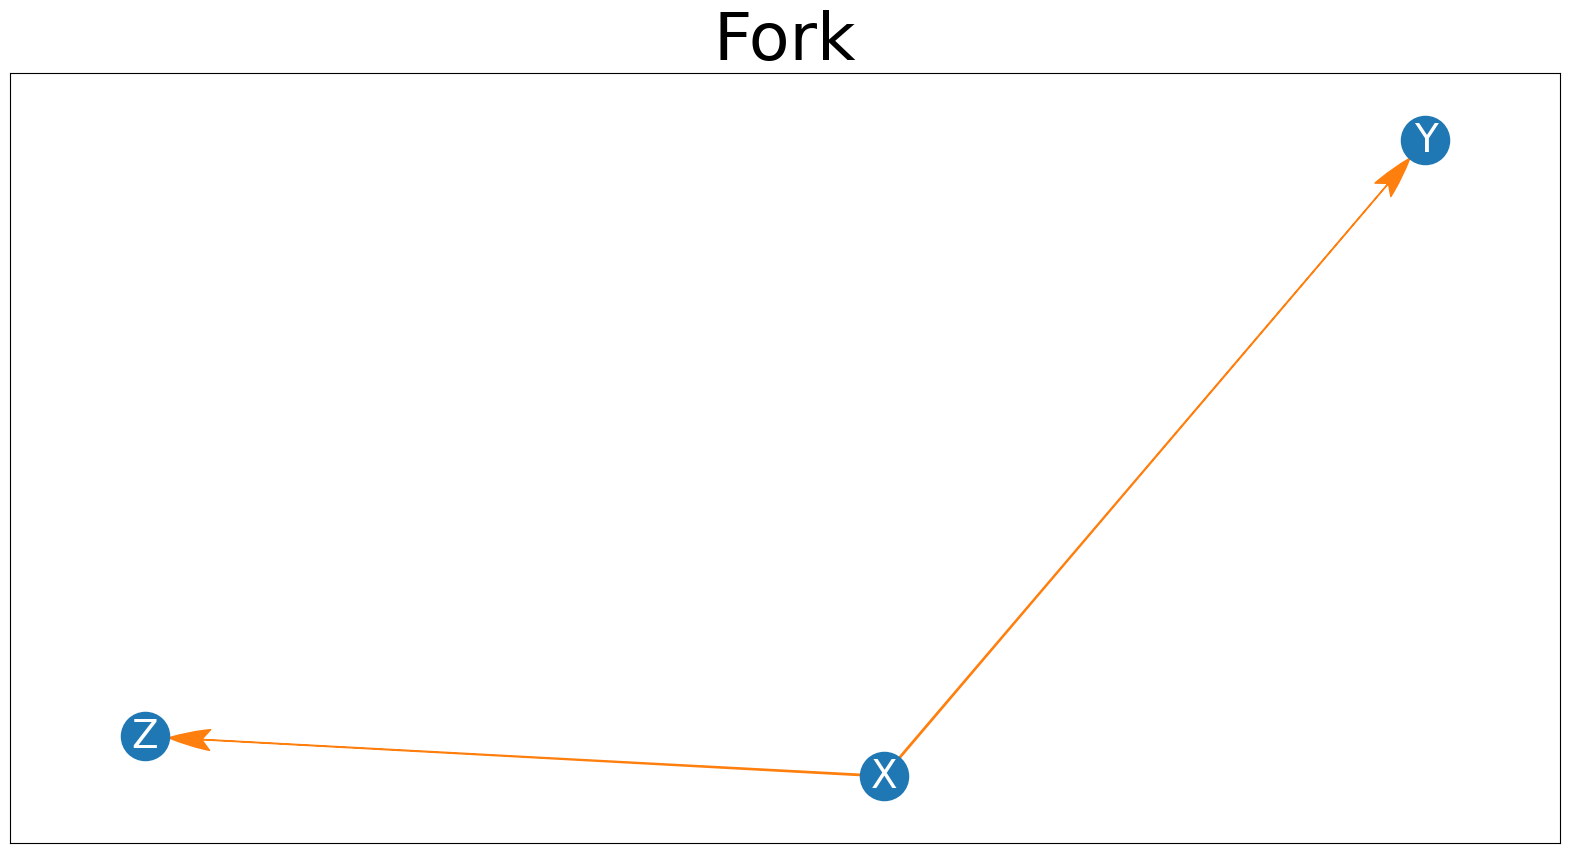

In [15]:
def plot_network(G, pos, title ="", node_size = 1200, 
                 font_color = "white",
                 font_size = 28,
                 alpha = 1, 
                 width = 1, 
                 edge_color = "C1"):
    fig, ax = plt.subplots(figsize = (20,10))
    nx.draw_networkx(G, pos, node_size = node_size,
                     with_labels = True, arrows = True,
                     font_color = font_color,
                     font_size = font_size, alpha = alpha,
                     width = width, edge_color = edge_color,
                     arrowstyle = ArrowStyle(
                         "Fancy, head_length=3, head_width=1.5, tail_width=.1"),
                     ax = ax)
    ax.set_title(title)
plot_network(G, pos, "Fork")

### Create a Fork

In [16]:
fork = {col:[] for col in cols}
for i in range(length):
    fork["X"].append(np.random.normal(0,1))
    fork["Y"].append(fork["X"][-1] + np.random.normal(0,1))
    fork["Z"].append(fork
                     ["X"][-1] *2 + np.random.normal(0,1))
fork = pd.DataFrame(fork)
fork

X         Y         Z
0      0.589959  0.628345 -0.401018
1     -0.642634 -0.293578  0.173637
2     -1.000881 -2.052114 -3.494852
3     -0.497895 -1.100660 -0.951253
4     -0.549838 -0.700894 -0.320717
...         ...       ...       ...
99995  1.842982  2.675953  3.467171
99996  1.068891  0.422661  3.587525
99997 -0.074501  0.878943  2.052316
99998  1.369185  3.087174  1.820954
99999  0.432080  0.827060  2.877831

[100000 rows x 3 columns]

In [17]:
fork.corr()

X         Y         Z
X  1.000000  0.709313  0.895791
Y  0.709313  1.000000  0.634110
Z  0.895791  0.634110  1.000000

In [18]:
XZc = fork[["X", "Z"]]
XZc["Constant"] = 1
Y = fork[["Y"]]
# pass y_var as list for consistent structure
model = sm.OLS(Y, XZc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                 5.063e+04
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:07:22   Log-Likelihood:            -1.4200e+05
No. Observations:              100000   AIC:                         2.840e+05
Df Residuals:                   99997   BIC:                         2.840e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              1.0084      0.007    142.598      0.000       0.995       1.022
Z             -0.0041      0.003     -1.298      0.194      -0.010       0.002
Constant       0.0051      0.003      1.619      0.105      -0.001       0.011
==============================================================================
Omnibus:                        0.510   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.520
Skew:                           0.002   Prob(JB):                        0.771
Kurtosis:                       2.989   Cond. No.                         5.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
fork.pcorr()

X         Y         Z
X  1.000000  0.411078  0.818284
Y  0.411078  1.000000 -0.004104
Z  0.818284 -0.004104  1.000000

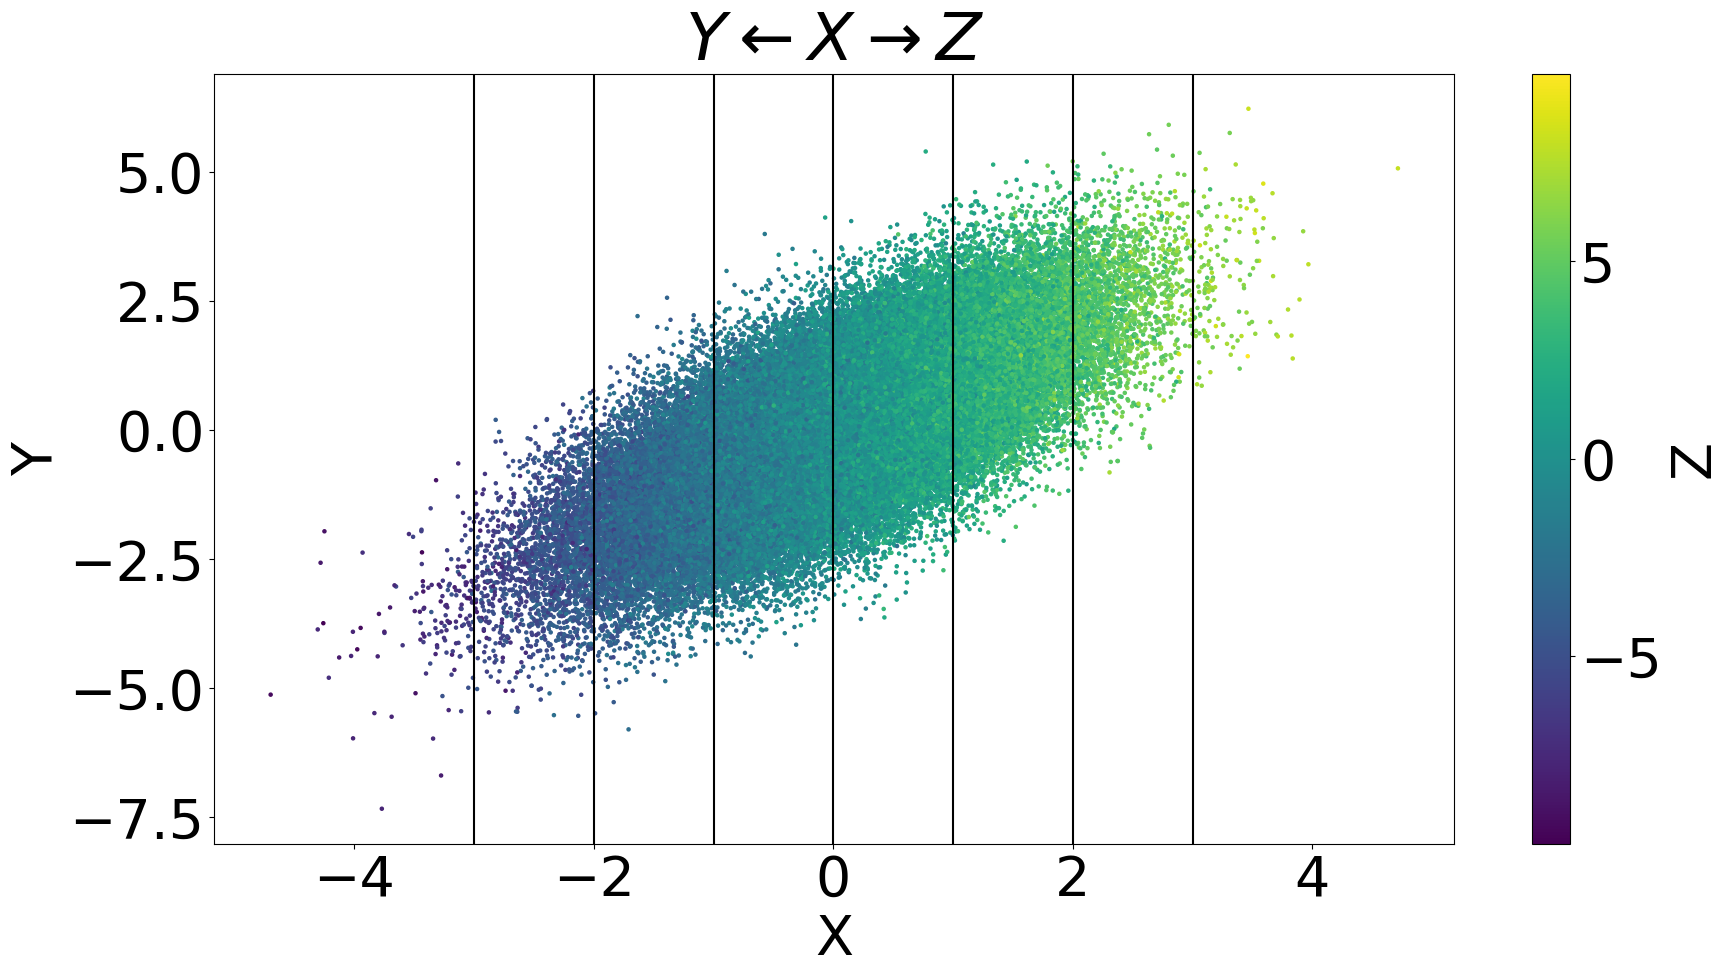

In [20]:
fig, ax = plt.subplots(figsize = (20,10))
fork.plot.scatter(x = "X", y = "Y", c = "Z",
                  s = 5, cmap = "viridis", ax = ax)
ax.set_title("$Y \\leftarrow X \\rightarrow Z$")
for i in range(-3,4): ax.axvline(i, c="k")

## Colliders

$$Y \rightarrow X \leftarrow Z$$

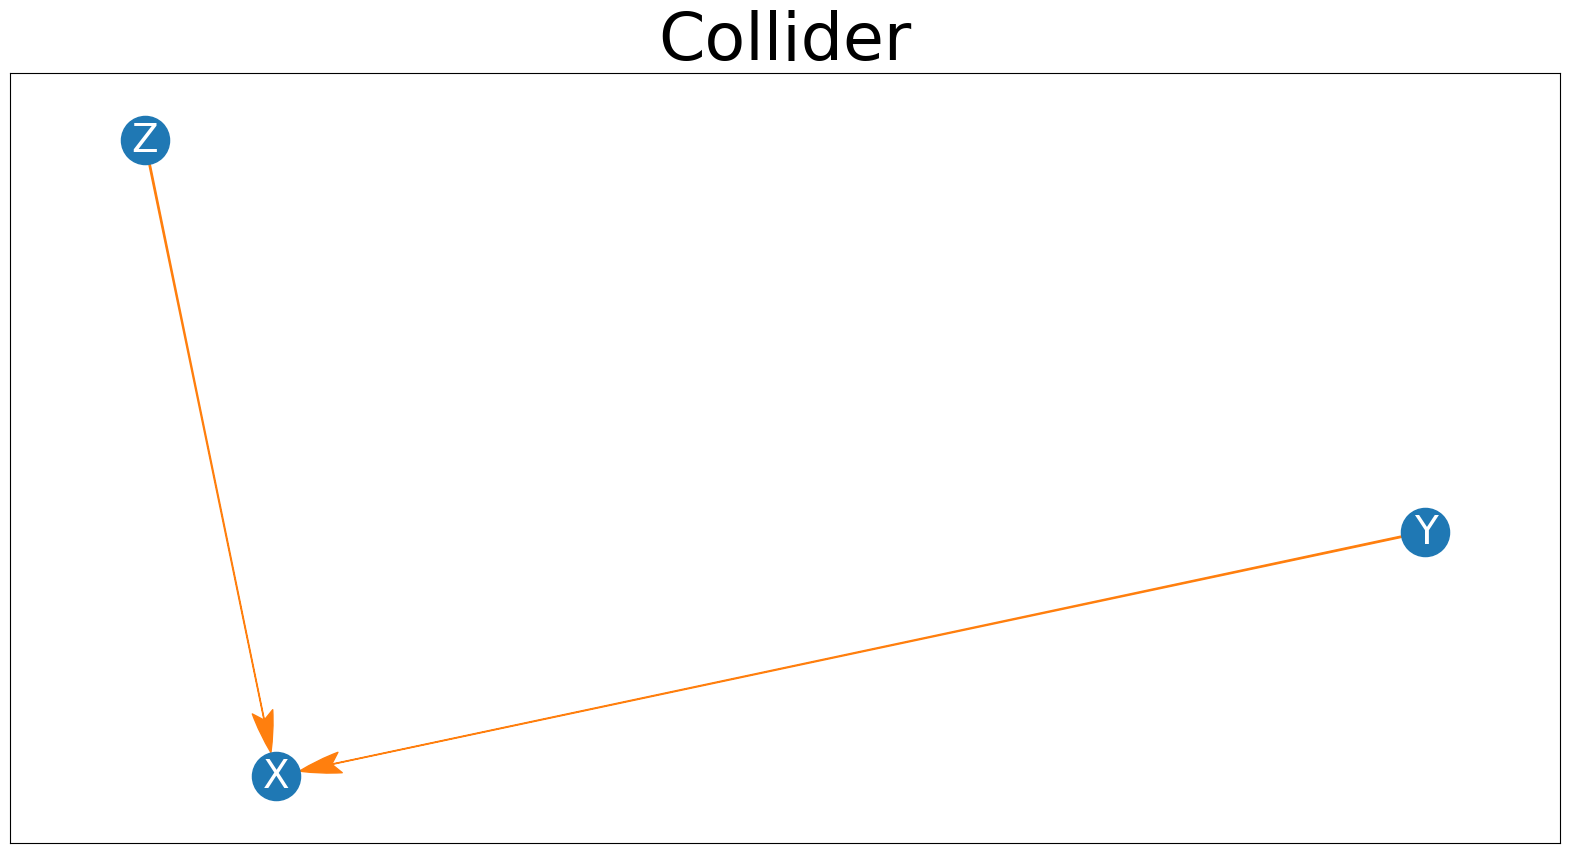

In [21]:
G = nx.DiGraph()
G.add_edges_from([("Y", "X"), ("Z", "X")])
pos = nx.spring_layout(G)
plot_network(G, pos, "Collider")

In [22]:
collider = {col:[] for col in cols}
for i in range(length):
    collider["Y"].append(np.random.normal(0,1))
    collider["Z"].append(np.random.normal(0,1))
    collider["X"].append(collider["Y"][-1] * -.5 + collider["Z"][-1] * .5 + np.random.normal(0,1))
collider = pd.DataFrame(collider)
collider

X         Y         Z
0     -0.702845  1.403729 -0.555581
1     -3.401673  1.386126 -0.251228
2      0.801708  0.593572  0.572763
3     -0.451517  0.346991 -2.484851
4      1.488307  0.321402  2.459170
...         ...       ...       ...
99995 -0.193830  0.609373  0.579229
99996  0.913395 -1.219232  0.264510
99997 -2.176968  1.889295  0.765505
99998  0.354225  1.195635  0.102183
99999 -1.705278 -0.020333 -0.670682

[100000 rows x 3 columns]

In [23]:
collider.corr()

X         Y         Z
X  1.000000 -0.405873  0.408450
Y -0.405873  1.000000  0.000771
Z  0.408450  0.000771  1.000000

In [24]:
YZc = collider[["Y", "Z"]]
YZc["Constant"] = 1
X = collider[["X"]]
model = sm.OLS(X, YZc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                 2.483e+04
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:07:30   Log-Likelihood:            -1.4164e+05
No. Observations:              100000   AIC:                         2.833e+05
Df Residuals:                   99997   BIC:                         2.833e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Y             -0.4959      0.003   -157.135      0.000      -0.502      -0.490
Z              0.4983      0.003    158.132      0.000       0.492       0.505
Constant      -0.0048      0.003     -1.508      0.131      -0.011       0.001
==============================================================================
Omnibus:                        5.359   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.355
Skew:                           0.016   Prob(JB):                       0.0687
Kurtosis:                       3.017   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
collider.pcorr()

X         Y         Z
X  1.000000 -0.445000  0.447259
Y -0.445000  1.000000  0.199648
Z  0.447259  0.199648  1.000000

Text(0.5, 1.0, '$Y \\rightarrow X \\leftarrow Z$')

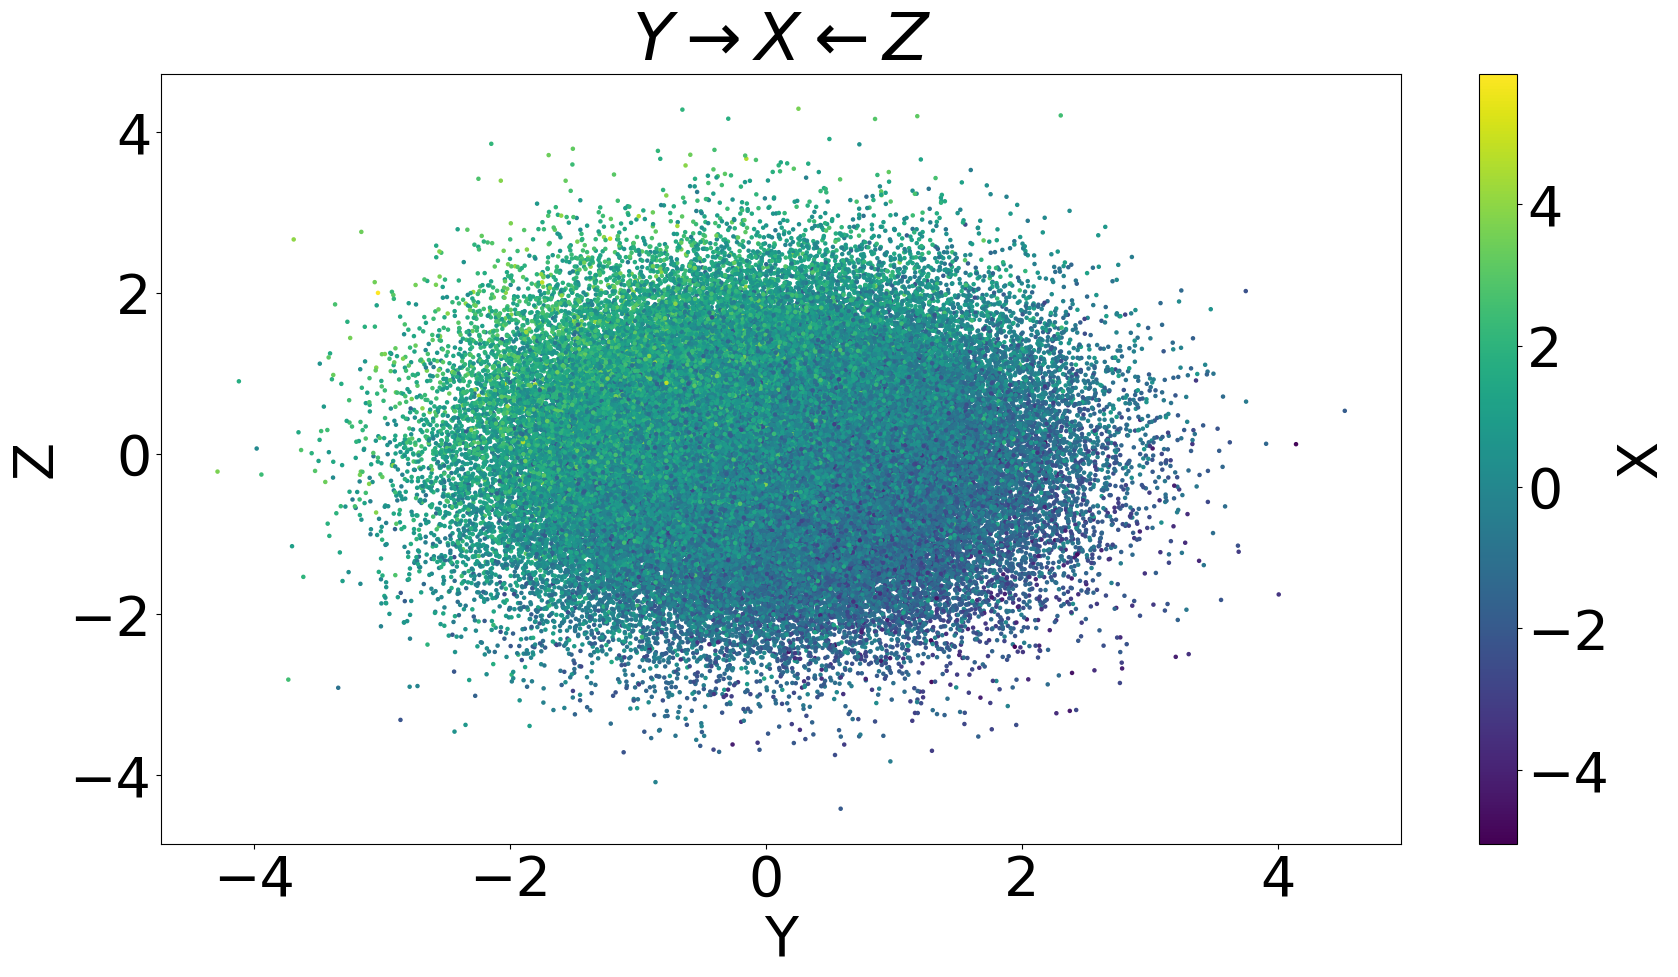

In [26]:
fig,ax = plt.subplots(figsize = (20,10))
collider.plot.scatter(x = "Y", y = "Z", c = "X",s = 5, cmap = "viridis", ax = ax)
ax.set_title("$Y \\rightarrow X \\leftarrow Z$")

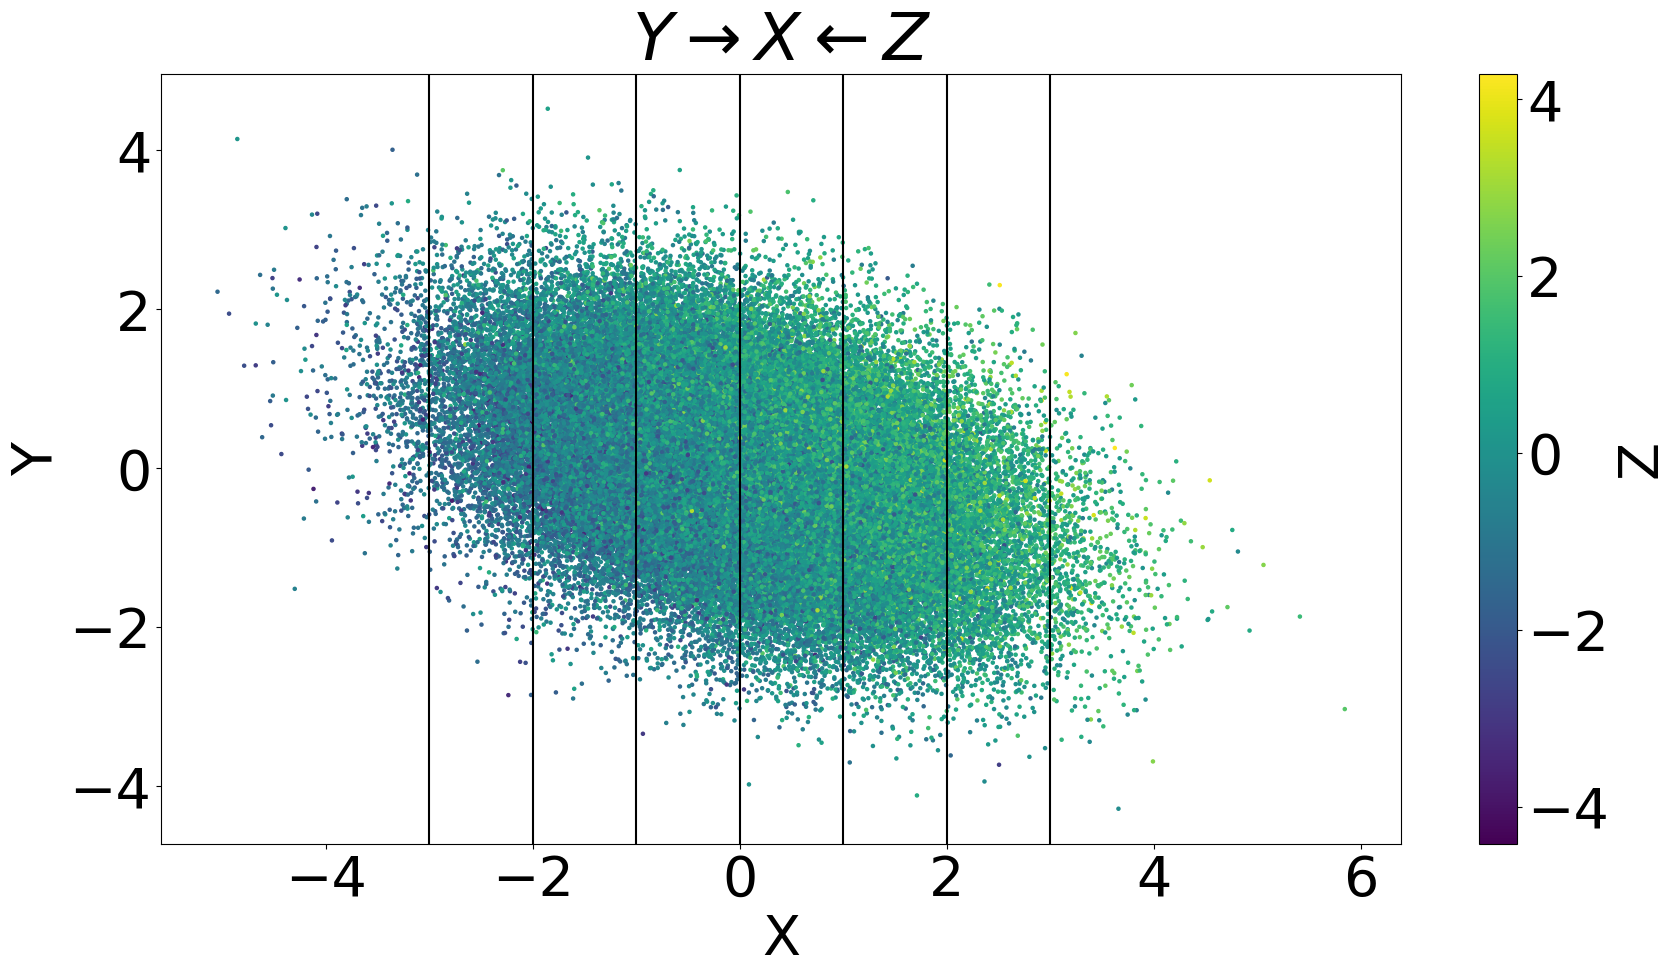

In [27]:
fig,ax = plt.subplots(figsize = (20,10))
collider.plot.scatter(x = "X", y = "Y", c = "Z",s = 5, cmap = "viridis", ax = ax)
ax.set_title("$Y \\rightarrow X \\leftarrow Z$")
for i in range(-3,4): ax.axvline(i, c = "k")

## Problems with Confounding

### Backdoor

In [28]:
G = nx.DiGraph()
G.add_edges_from([("Q", "X"), ("Q", "Y"), ("X", "Z"), ("Y","Z")])
pos = nx.spring_layout(G)

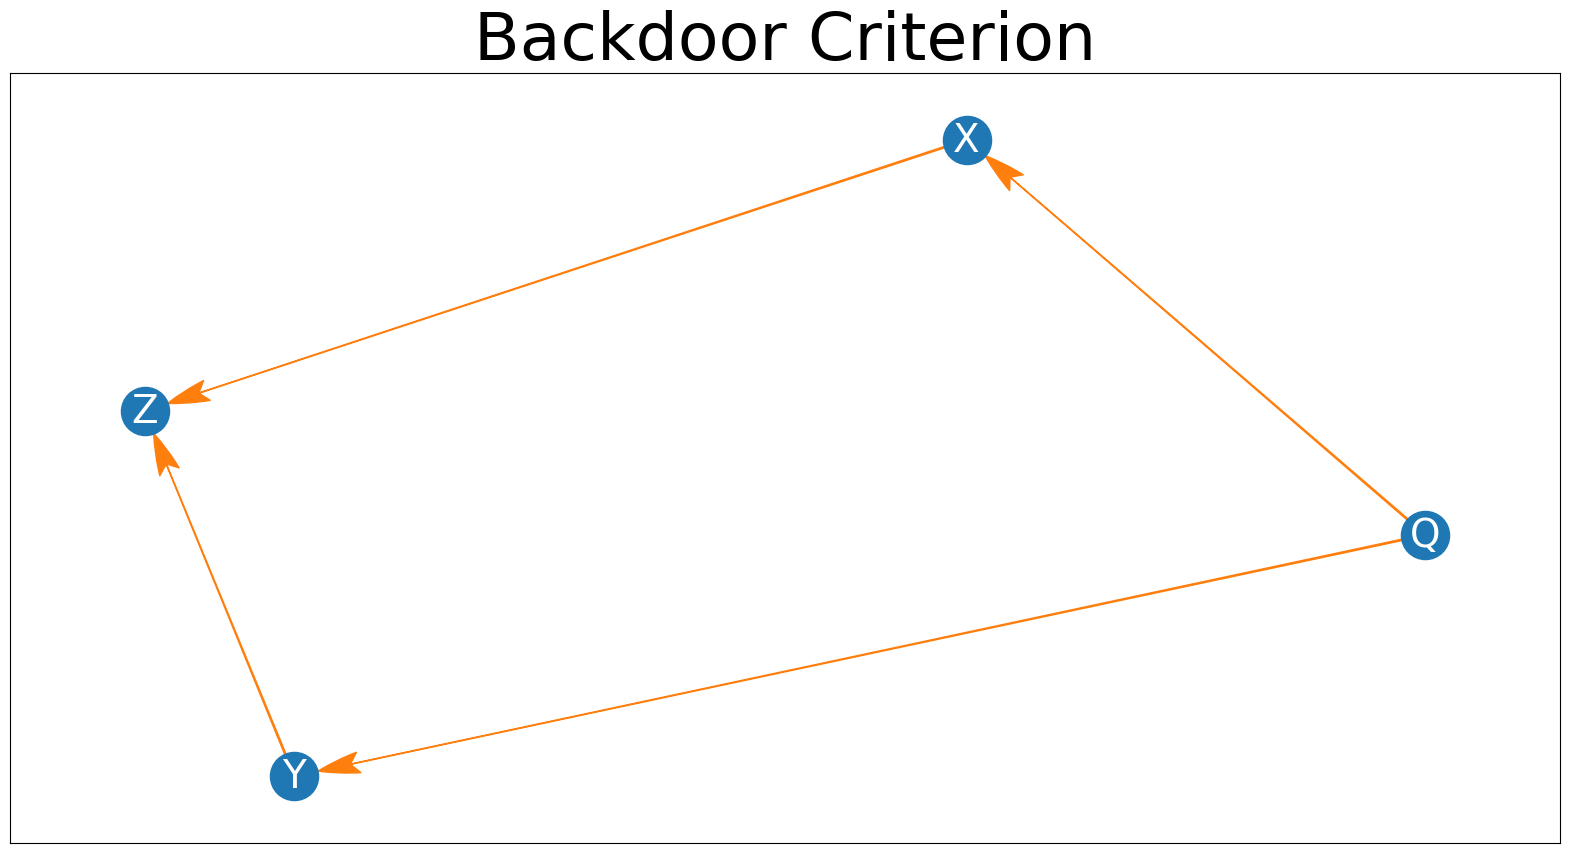

In [29]:
plot_network(G, pos, "Backdoor Criterion")

In [30]:
cols = ["Q", "X", "Y", "Z"]
mu = 0
sigma = 1

backdoor = {col:[] for col in cols}
for i in range(length):
    backdoor["Q"].append(np.random.normal(mu, sigma))
    backdoor["X"].append(3 * backdoor["Q"][-1] + np.random.normal(mu, sigma))
    backdoor["Y"].append(-1 * backdoor["Q"][-1] + np.random.normal(mu, sigma))
    backdoor["Z"].append(1.5 * backdoor["X"][-1] + backdoor["Y"][-1] * -2 + np.random.normal(mu, sigma))
backdoor = pd.DataFrame(backdoor)
backdoor

Q         X         Y         Z
0      0.975699  1.694636 -0.539060  2.724350
1     -0.807598 -1.150555  1.130895 -4.754300
2     -1.259018 -4.714187  0.385249 -6.895909
3      0.385908  0.905118 -0.243900  3.574177
4     -0.166490 -1.202882 -0.542677 -0.218855
...         ...       ...       ...       ...
99995  0.873783  2.464742 -1.907818  7.632836
99996  0.021915  0.411733 -0.864314  1.369140
99997 -1.179884 -3.766110  2.246892 -9.829907
99998 -0.669422 -1.551457 -0.468200 -2.071936
99999 -0.712347 -3.296028  1.354800 -7.611402

[100000 rows x 4 columns]

In [31]:
QXYc = backdoor[["Q", "X","Y"]]
QXYc["Constant"] = 1
Z = backdoor[["Z"]]
# pass y_var as list for consistentj structure
model = sm.OLS(Z, QXYc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.612e+06
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:07:41   Log-Likelihood:            -1.4188e+05
No. Observations:              100000   AIC:                         2.838e+05
Df Residuals:                   99996   BIC:                         2.838e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q             -0.0101      0.010     -0.962      0.336      -0.031       0.010
X              1.5022      0.003    475.953      0.000       1.496       1.508
Y             -2.0007      0.003   -631.979      0.000      -2.007      -1.994
Constant       0.0012      0.003      0.375      0.708      -0.005       0.007
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.818
Skew:                           0.009   Prob(JB):                        0.403
Kurtosis:                       3.009   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Frontdoor Criterion

In [32]:
cols = ["Q", "X", "Y", "Z"]
mu = 0
sigma = 1

frontdoor = {col:[] for col in cols}
for i in range(length):
    frontdoor["Q"].append(np.random.normal(mu, sigma))
    frontdoor["X"].append(10 * frontdoor["Q"][-1] + np.random.normal(mu, sigma))
    frontdoor["Y"].append(frontdoor["X"][-1] * 2 + np.random.normal(mu, sigma))
    frontdoor["Z"].append(frontdoor["Q"][-1] * -1 + frontdoor["Y"][-1] + np.random.normal(mu, sigma))
frontdoor = pd.DataFrame(frontdoor)
frontdoor

Q          X          Y          Z
0      3.319700  33.811945  67.086402  64.794479
1     -0.479848  -5.265163 -12.562817 -11.746261
2      0.282834   4.656615  10.930791   8.870589
3     -0.184596  -1.176397  -0.767470  -1.301624
4      0.161341   0.709174   2.617523   0.414305
...         ...        ...        ...        ...
99995 -1.005435  -9.451941 -18.168557 -16.902334
99996  2.364711  24.783732  48.733598  45.270478
99997 -0.669022  -7.360671 -14.602919 -13.236517
99998  1.733305  16.893204  33.388827  32.726370
99999 -0.995675 -10.080862 -20.394881 -20.611868

[100000 rows x 4 columns]

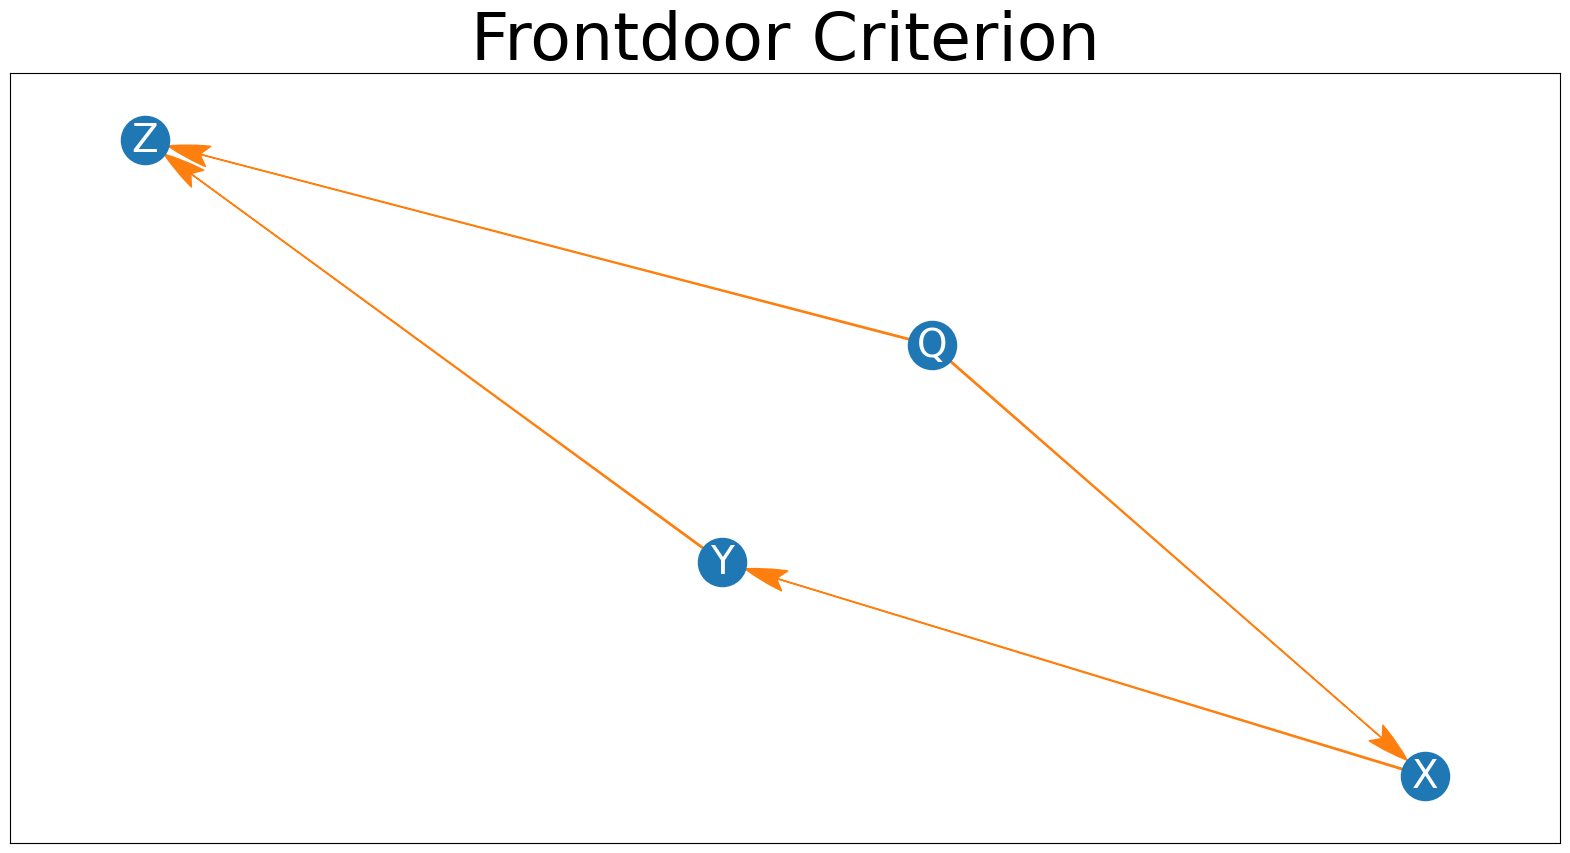

In [33]:
G = nx.DiGraph()
G.add_edges_from([("Q", "X"), ("Q", "Z"), ("X", "Y"), ("Y", "Z")])
pos = nx.spring_layout(G)
plot_network(G, pos, "Frontdoor Criterion")

In [34]:
Xc = frontdoor[["X"]]
Xc["Constant"] = 1
Z = frontdoor[["Z"]]
model = sm.OLS(Z, Xc)
results = model.fit()
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20528\1536465617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xc["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.797e+07
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:07:44   Log-Likelihood:            -1.7678e+05
No. Observations:              100000   AIC:                         3.536e+05
Df Residuals:                   99998   BIC:                         3.536e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              1.9005      0.000   4239.178      0.000       1.900       1.901
Constant      -0.0040      0.004     -0.892      0.372      -0.013       0.005
==============================================================================
Omnibus:                        0.698   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.701
Skew:                           0.006   Prob(JB):                        0.704
Kurtosis:                       2.998   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
XYc = frontdoor[["X", "Y"]]
XYc["Constant"] = 1
Z = frontdoor[["Z"]]
model = sm.OLS(Z, XYc)
results = model.fit()
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20528\3814303157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYc["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.775e+07
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:07:44   Log-Likelihood:            -1.4287e+05
No. Observations:              100000   AIC:                         2.857e+05
Df Residuals:                   99997   BIC:                         2.858e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             -0.0932      0.006    -14.546      0.000      -0.106      -0.081
Y              0.9970      0.003    311.510      0.000       0.991       1.003
Constant      -0.0027      0.003     -0.850      0.395      -0.009       0.004
==============================================================================
Omnibus:                        2.464   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                2.453
Skew:                           0.011   Prob(JB):                        0.293
Kurtosis:                       3.009   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
QXc = frontdoor[["Q", "X"]]
QXc["Constant"] = 1
Z = frontdoor[["Z"]]
model = sm.OLS(Z, QXc)
results = model.fit()
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20528\2209165990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QXc["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 9.035e+06
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:07:44   Log-Likelihood:            -1.7651e+05
No. Observations:              100000   AIC:                         3.530e+05
Df Residuals:                   99997   BIC:                         3.531e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q             -1.0531      0.045    -23.360      0.000      -1.141      -0.965
X              2.0048      0.004    446.866      0.000       1.996       2.014
Constant      -0.0037      0.004     -0.820      0.412      -0.012       0.005
==============================================================================
Omnibus:                        0.990   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.991
Skew:                           0.008   Prob(JB):                        0.609
Kurtosis:                       2.999   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
QXYc = frontdoor[["Q","X","Y"]]
QXYc["Constant"] = 1
Z = frontdoor[["Z"]]
# pass y_var as list for consistent structure
model = sm.OLS(Z, QXYc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.197e+07
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:07:44   Log-Likelihood:            -1.4231e+05
No. Observations:              100000   AIC:                         2.846e+05
Df Residuals:                   99996   BIC:                         2.847e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q             -1.0701      0.032    -33.412      0.000      -1.133      -1.007
X              0.0124      0.007      1.741      0.082      -0.002       0.026
Y              0.9972      0.003    313.299      0.000       0.991       1.003
Constant      -0.0024      0.003     -0.748      0.454      -0.009       0.004
==============================================================================
Omnibus:                        3.269   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                3.258
Skew:                           0.013   Prob(JB):                        0.196
Kurtosis:                       3.011   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Generate artificial data to be used to detect a directed acyclic graph

In [96]:
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5

lst_dct = {col: [] for col in cols}
for i in range(length):
    lst_dct["P"].append(np.random.normal(mu, 0.5 * sigma))
    lst_dct["Q"].append(np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1] + np.random.normal(mu, sigma))
    lst_dct["Y"].append(lst_dct["Q"][-1] + np.random.normal(mu, sigma))
    lst_dct["Z"].append(lst_dct["P"][-1] * 0.5 + lst_dct["X"][-1] + lst_dct["Y"][-1] * -2 + np.random.normal(mu, sigma))
df = pd.DataFrame(lst_dct)
df

P          Q          X          Y          Z
0     -0.194436   1.677041  11.642081   8.584425 -10.180576
1     -4.659191   4.714971  11.395058  12.542036 -19.274730
2     -2.412742   1.341116   6.606806   0.436943  17.744268
3      0.293716  -3.328730 -17.325233   9.825381 -36.597341
4      1.089687  -1.061497   4.030845  -3.276049  10.513903
...         ...        ...        ...        ...        ...
99995 -4.046128  -4.896261 -12.737670  -2.374667  -8.517550
99996 -1.614877   0.795196  -1.414651   2.741089  -5.634974
99997  1.952015  12.615540  36.036508  12.418052  20.696419
99998  4.156965   4.478905   9.048881   8.633027  -0.280526
99999 -1.480576   3.994275  12.604566   6.844466   4.062919

[100000 rows x 5 columns]

## Using partial correlations to build a causal skeleton


1. Build a fully connected graph
2. For each variable, test every possible with the remaining variables. If a correlation between, for example, variables $X$ and $Y$ is not statistically significant, remove the link $XY$.
3. For variables whose correlation is statistically significant, test every possible combination of control variables. If the statistical significance of any of the tested partial correlations is broken, remove the link $XY$.
4. If after steps 2 and 3, the link $XY$ remains that link will be included in the skeleton.

### Build Undirected Graph

In [97]:
undirected_graph = {key:[a  for a in cols if a != key] for key in cols}
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [98]:
graph_list = []
for source, sinks in undirected_graph.items():
    for sink in sinks:
        graph_list.append((source, sink))


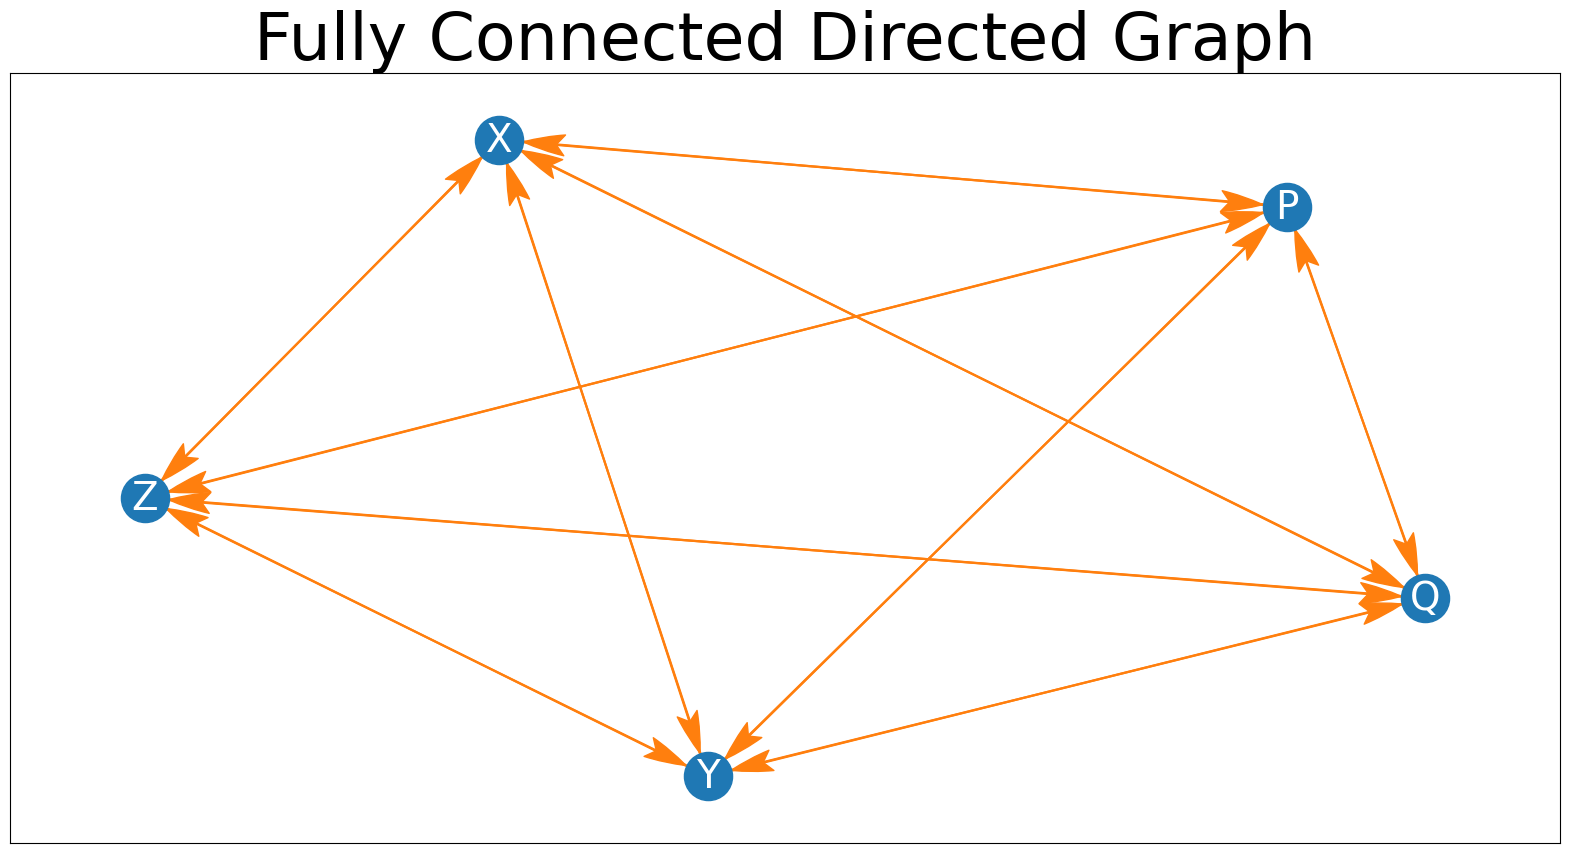

In [99]:
G = nx.DiGraph()
G.add_edges_from(graph_list)
pos = nx.spring_layout(G)
plot_network(G, pos, "Fully Connected Directed Graph")

## Infer Grahical Skeleton from Data

In [100]:
import copy
p_val = .001
def build_skeleton(df, undirected_graph):    
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:

                c_used.append(c_var)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    #breakout of the for 
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
                
    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
            # first check for correlation with no controls
                test = df.partial_corr(x = x, 
                                       y = y, 
                                       covar = None,
                                       method = "pearson") 
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
            # if correlated check for deseparation controlling for other variables
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(df, undirected_graph)                                   
undirected_graph

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

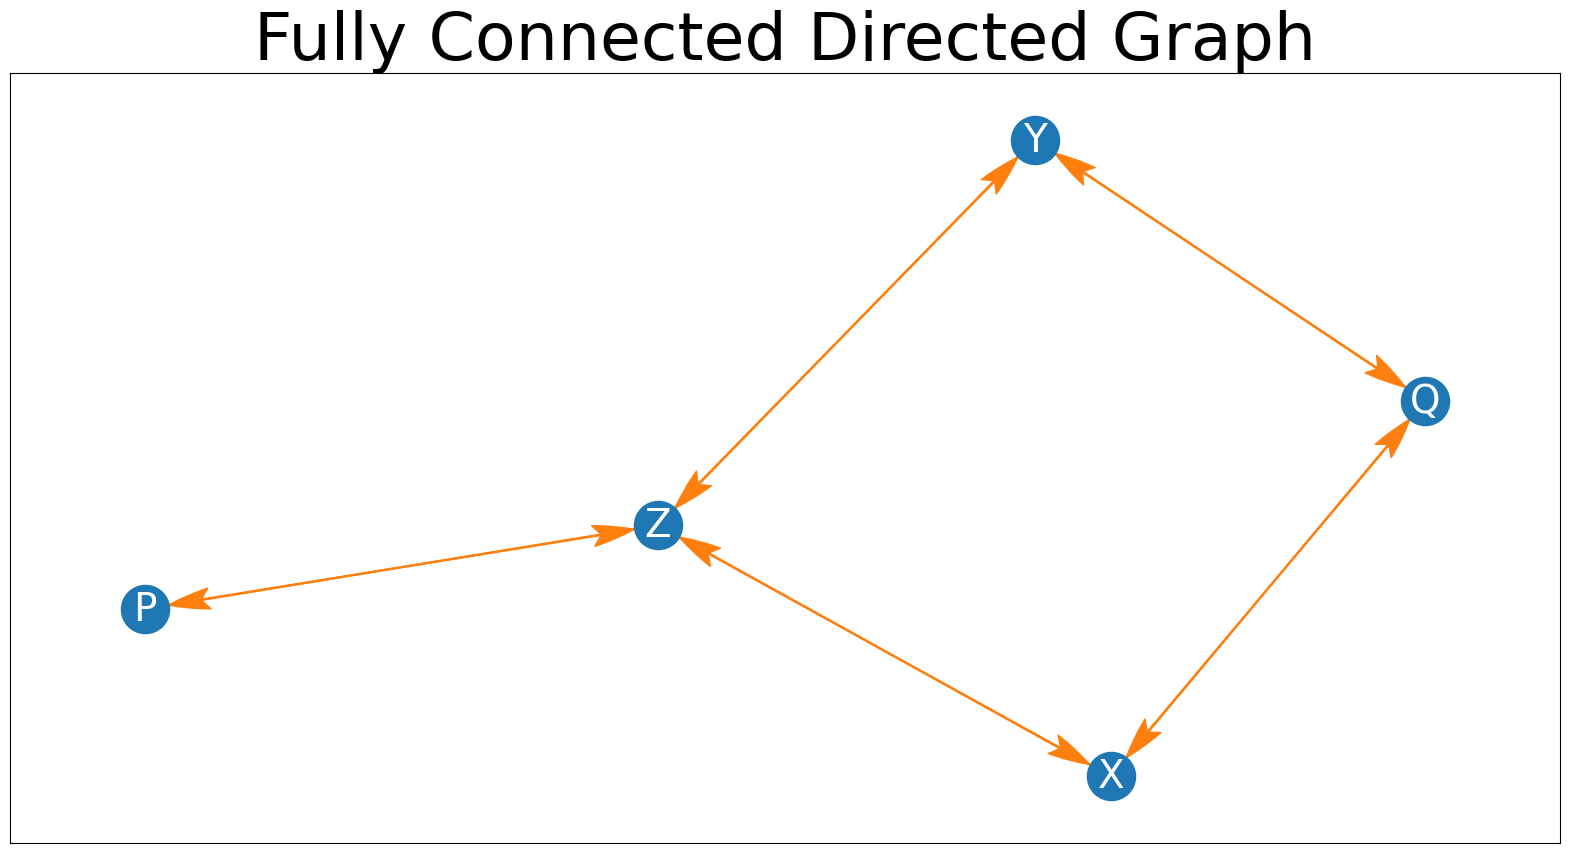

In [101]:
graph_list = []
for source, sinks in undirected_graph.items():
    for sink in sinks:
        graph_list.append((source, sink))
G = nx.DiGraph()
G.add_edges_from(graph_list)
pos = nx.spring_layout(G)
plot_network(G, pos, "Fully Connected Directed Graph")

In [102]:
# !pip install pgmpy

In [103]:
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2

model = c.estimate(return_type = "dag", variant = "parallel", # "parallel", "stable"
                   significance_level = p_val,
                   max_cond_vars = max_cond_vars,
                   ci_test = "pearsonr")
edges = model.edges()

  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


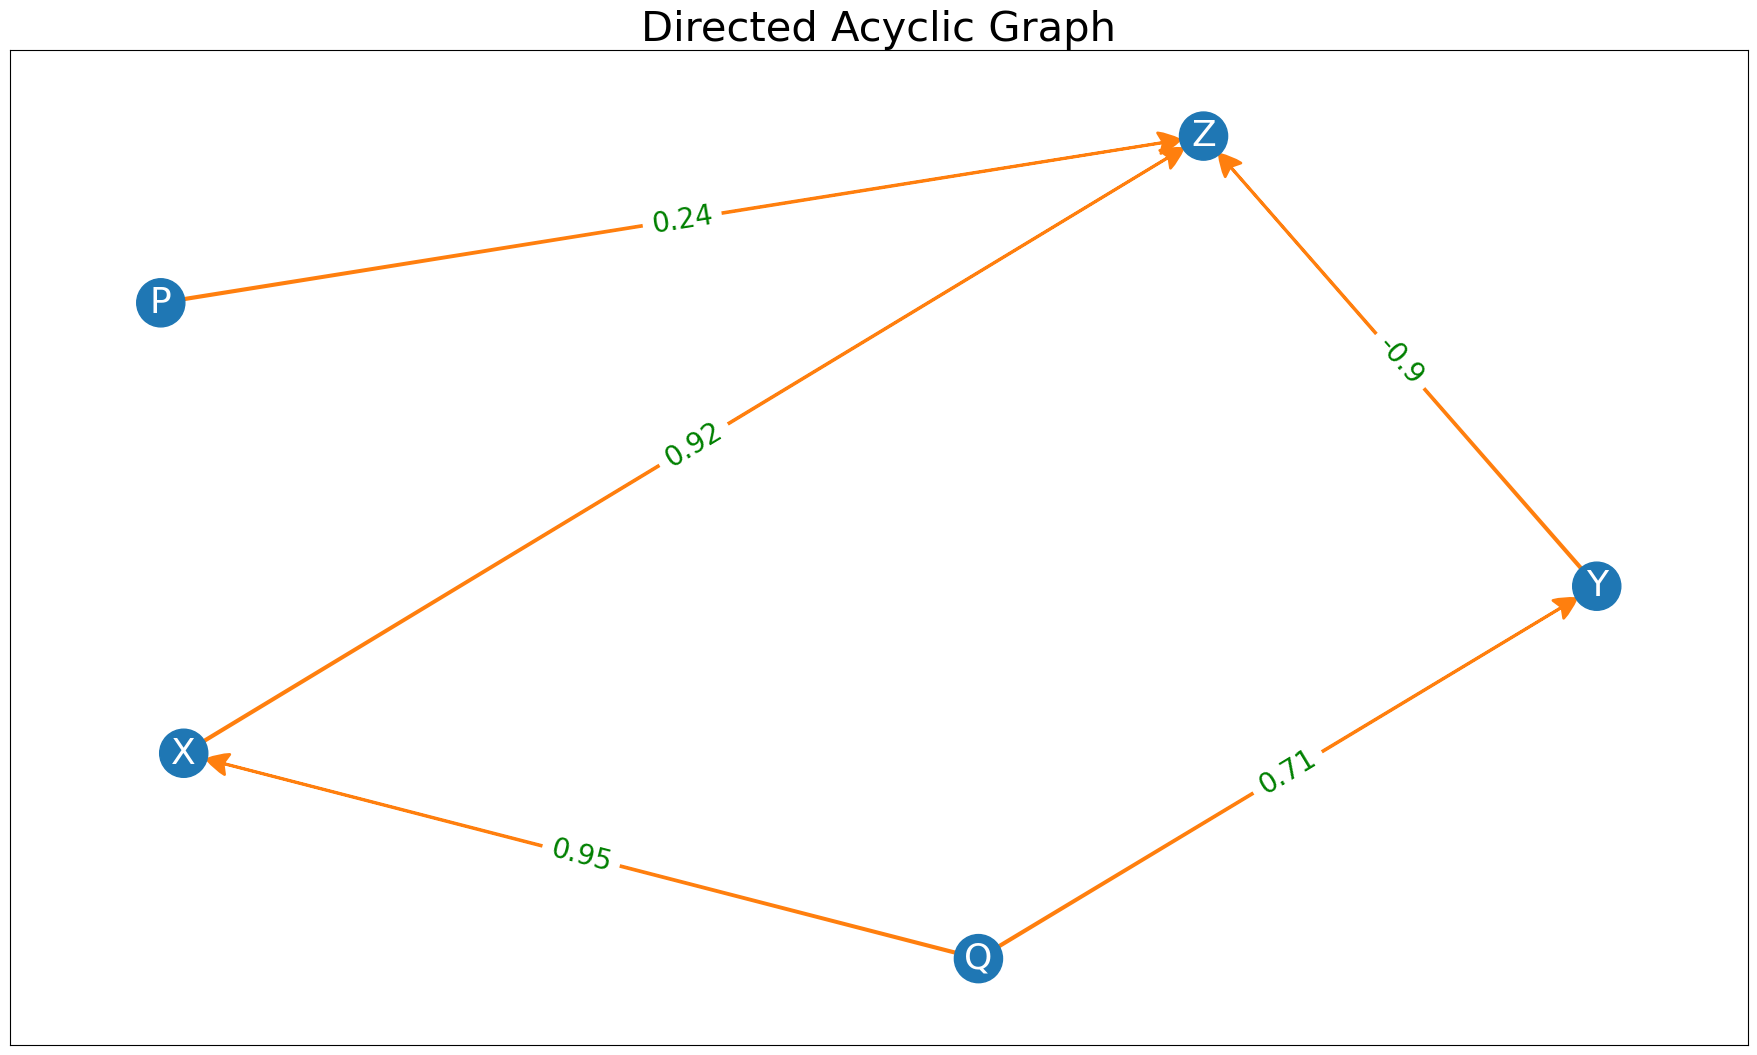

In [106]:
def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    
    ############ Add ############
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            # Check if the caused variable is also a caused variable in any other links
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
            if (control, edge[1]) in control_edges:
                keep_controls.append(control)                
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
####### End Add #########
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color = color_map, node_size = 1200,
        with_labels = True, arrows = True,
        font_color = "white",
        font_size = 26, alpha = 1,
        width = 2, edge_color = "C1",
        arrowstyle = ArrowStyle("Fancy, head_length=1.5, head_width=1.5, tail_width=0.1"),
        ax = ax )
################# Add ####################
    nx.draw_networkx_edge_labels(graph,pos,
                                edge_labels=edge_labels,
                                font_color='green',
                                font_size=20)
graph_DAG(edges, df, title = "Directed Acyclic Graph")